In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
chd_df = pd.read_csv('chd_data.csv')
chd_df.head()

,age,chd
0,20,0
1,23,0
2,24,0
3,25,1
4,25,0


In [5]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     100 non-null    int64
 1   chd     100 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [6]:
chd_df.describe()

,age,chd
count,100.000000,100.00000
mean,44.380000,0.43000
std,11.721327,0.49757
min,20.000000,0.00000
25%,34.750000,0.00000
50%,44.000000,0.00000
75%,55.000000,1.00000
max,69.000000,1.00000


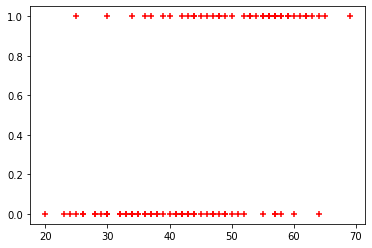

In [7]:
plt.scatter(chd_df['age'], chd_df['chd'], color='red', marker='+')

In [9]:
from sklearn.model_selection import train_test_split
predictor = ['age']
target = 'chd'

x = chd_df[predictor]
y= chd_df[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [14]:
type(x_train)

pandas.core.frame.DataFrame

In [13]:
type(y_train)

pandas.core.series.Series

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [17]:
print(f'intercept: {model.intercept_}\ncoefficient: {model.coef_}')

intercept: [-5.65118929]
coefficient: [[0.11144281]]


In [30]:
test = np.array([51]).reshape(1,-1)
print('probabilities: ', model.predict_proba(test))
print('CHD value: ', model.predict(test))

probabilities:  [[0.49190219 0.50809781]]
CHD value:  [1]


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [44]:
model.predict_proba(test).shape

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


(1, 2)

In [45]:
x_test.head()

,age
26,35
86,58
2,24
55,46
75,55


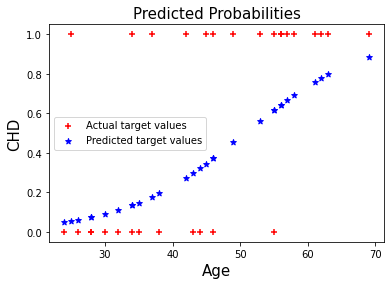

In [50]:
y_hat = model.predict_proba(x_test)[:, 1]

plt.scatter(x_test['age'], y_test, label='Actual target values', color='red', marker='+')
plt.scatter(x_test['age'], y_hat, label='Predicted target values', color='blue', marker='*')

plt.title('Predicted Probabilities', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('CHD', fontsize=15)
plt.legend()